# Parameters `width_unit`/`height_unit`

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


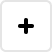
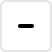
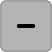
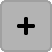
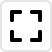
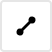
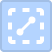
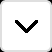
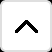
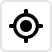
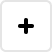
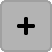
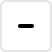
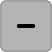
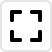
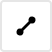
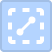
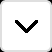
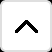
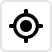

In [2]:
LetsPlot.setup_html()

## `geom_errorbar()`

### [Issue #1288](https://github.com/JetBrains/lets-plot/issues/1288) - Allow absolute width for geom_errorbar (and possibly others)

In [3]:
def get_errorbar_data():
    xs = list("ABCDEFGHIJKLMNOP")
    return pd.DataFrame({
        'x': xs,
        'ymin': [i % 4 for i in range(len(xs))],
        'ymax': [i % 4 + 2.5 for i in range(len(xs))],
        'width': [10 * (i % 4 + 1) for i in range(len(xs))]
    })

errorbar16_df = get_errorbar_data()
errorbar4_df = errorbar16_df.iloc[:4]

In [4]:
def get_errorbar_plot(df, width=None, width_unit=None):
    cat_size = len(df['x'].unique())
    return ggplot(df) + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax'),
                      width=width, width_unit=width_unit) + \
        ggtitle("categories count: {0}\nwidth={1}, width_unit={2}".format(
            cat_size, width, width_unit
        ))

In [5]:
gggrid([
    get_errorbar_plot(errorbar16_df, width=.5),
    get_errorbar_plot(errorbar4_df, width=.5),
    get_errorbar_plot(errorbar16_df, width=20, width_unit='px'),
    get_errorbar_plot(errorbar4_df, width=20, width_unit='px'),
], ncol=2)

### Tests

In [6]:
def get_errorbar_test_plot(width, size_scale):
    if width is None:
        mapping = aes(x='x', ymin='ymin', ymax='ymax', width='width')
        title = "Mapped width"
    else:
        mapping = aes(x='x', ymin='ymin', ymax='ymax')
        title = "Constant width={0}".format(width)
    p = ggplot(errorbar4_df) + \
        geom_errorbar(mapping, width_unit='px', width=width)
    title += "\n"
    if size_scale == 'identity':
        p += scale_size_identity()
        title += "Identity size scale"
    else:
        title += "Default size scale"
    return p + ggtitle(title)
    

gggrid([
    get_errorbar_test_plot(None, None),
    get_errorbar_test_plot(None, 'identity'),
    get_errorbar_test_plot(30, None),
    get_errorbar_test_plot(30, 'identity'),
], ncol=2)